## Decision Tree Classifier

In [1]:
import pandas as pd

In [2]:
df= pd.read_csv("Iris_.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 6)

In [4]:
#Checking if there is any missing values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [6]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


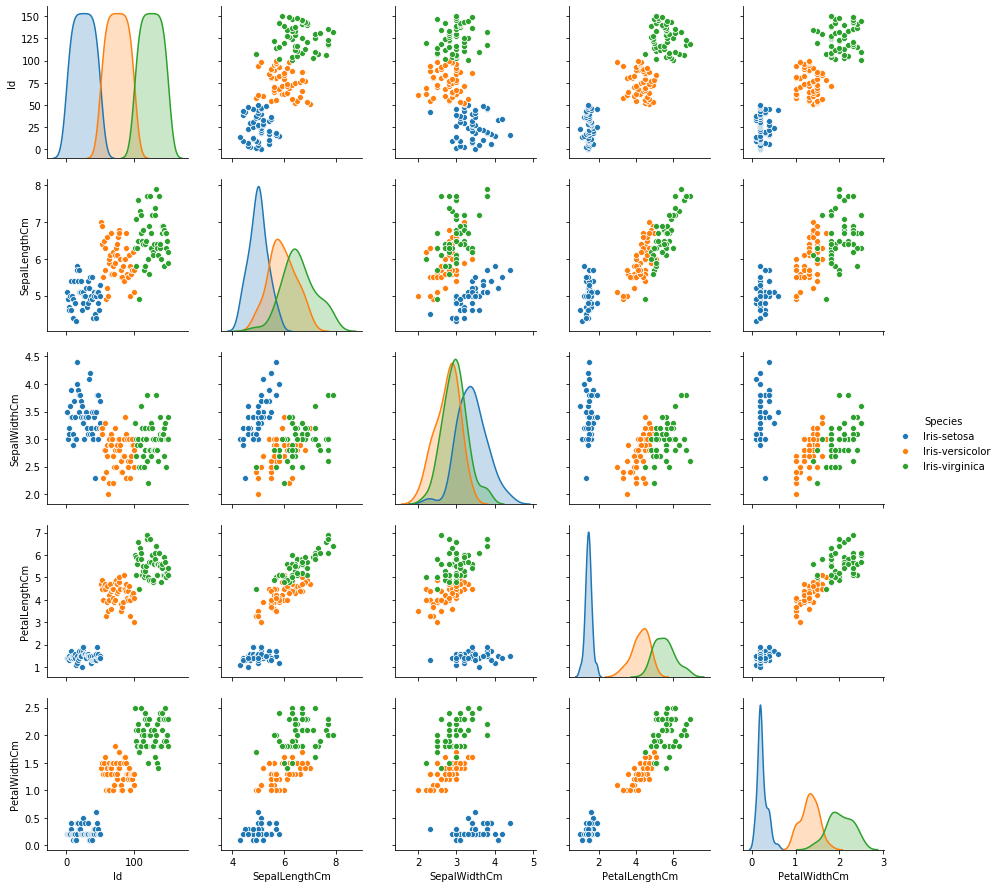

In [8]:
import seaborn as sns
sns.pairplot(df, hue='Species')


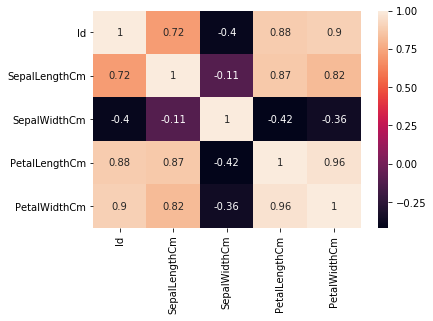

In [9]:
## Correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt
corr= df.corr()
top_feature=corr.index
ax= sns.heatmap(df[top_feature].corr(),annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [10]:
X= df.iloc[:,[1,2,3,4]]
y= df.iloc[:,-1]

### Decision Tree Classifier

In [11]:
#Train Test Split
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.20)


In [12]:
from sklearn import tree

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
model = DecisionTreeClassifier(criterion='entropy')

In [15]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [16]:
y_pred=model.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 6  0  0]
 [ 0 13  0]
 [ 0  1 10]]
0.9666666666666667
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         6
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.91      0.95        11

      micro avg       0.97      0.97      0.97        30
      macro avg       0.98      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



### RandomizedSearchCV
( Hyperparameter Optimization)

In [23]:
import numpy as np
import random
from sklearn.model_selection import RandomizedSearchCV

In [24]:
from random import randint

In [ ]:
DecisionTreeClassifier()

In [67]:
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 60,35)]
# Minimum number of samples required to split a node
min_samples_split = [2,3,4 ,5,7,9]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random g rid
random_grid = {'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'max_depth': [2, 3, 5, 7, 8, 10, 12, 13, 15, 17, 19, 20, 22, 24, 25, 27, 29, 31, 32, 34, 36, 37, 39, 41, 42, 44, 46, 48, 49, 51, 53, 54, 56, 58, 60], 'min_samples_split': [2, 3, 4, 5, 7, 9], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


Thus the accuracy is greatest when tree depth is taken as 3 and after that the tree depth becomes constant. Thus max_depth=3 should be chosen

In [68]:
model_n= DecisionTreeClassifier()

In [69]:
model_ncv= RandomizedSearchCV(estimator=model_n,param_distributions=random_grid, n_iter=100,cv=5, random_state=100,n_jobs=-1,
                              verbose=2)
model_ncv.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.7s finished
C:\Users\acer\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'max_depth': [2, 3, 5, 7, 8, 10, 12, 13, 15, 17, 19, 20, 22, 24, 25, 27, 29, 31, 32, 34, 36, 37, 39, 41, 42, 44, 46, 48, 49, 51, 53, 54, 56, 58, 60], 'min_samples_split': [2, 3, 4, 5, 7, 9], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']},
          pre_dispatch='2*n_jobs', random_state=100, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [70]:
model_ncv.best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 8,
 'max_depth': 22,
 'criterion': 'gini'}

In [71]:
model_ncv.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=22,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [74]:
model_1= DecisionTreeClassifier(min_samples_split= 2,min_samples_leaf= 8,max_depth= 22,
 criterion= 'gini')
model_1.fit(X_train,y_train)
accuracy= model_1.score(X_test,y_test)
accuracy

0.9333333333333333

In [75]:
feature= ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']

In [76]:
names=['setosa','versicolor','virginica']

In [77]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

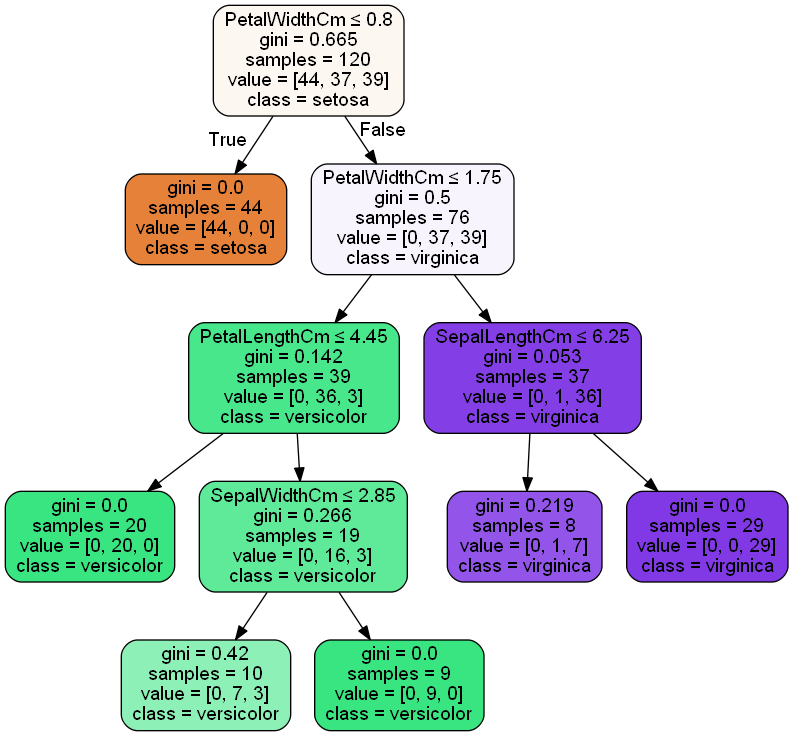

In [78]:
dot_data = StringIO()
export_graphviz(model_1, out_file=dot_data, feature_names=feature,
                class_names= names, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())